In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import math

In [2]:
pwd

'C:\\Users\\15714\\Documents\\GMU\\Classes\\senior\\CDS-490'

In [3]:
df_false = pd.read_csv('C:/Users/15714/Documents/GMU/Classes/senior/CDS-490/data/false_tweets.csv')
df_real = pd.read_csv('C:/Users/15714/Documents/GMU/Classes/senior/CDS-490/data/real_tweets.csv')
df_real = df_real.sample(n = 5339)

C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (240,275,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,328,329) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,171,172,173) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_real['real'] = 1
df_false['real'] = 0
df = pd.concat([df_real,df_false])

In [69]:
len(df_false.columns)

331

In [6]:
df.columns

Index(['Unnamed: 0', 'created_at', 'id', 'id_str', 'text', 'truncated',
       'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id',
       ...
       'retweeted_status.place.country_code', 'retweeted_status.place.country',
       'retweeted_status.place.contained_within',
       'retweeted_status.place.bounding_box.type',
       'retweeted_status.place.bounding_box.coordinates',
       'retweeted_status.quoted_status.entities.media',
       'retweeted_status.quoted_status.extended_entities.media',
       'scopes.followers', 'retweeted_status.quoted_status.quoted_status_id',
       'retweeted_status.quoted_status.quoted_status_id_str'],
      dtype='object', length=332)

In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
# remove columns with many NaN values

for i in df.columns:
    if df[i].isnull().sum() >= 4000:
        df.drop(i,axis=1,inplace=True)

In [9]:
df.reset_index(inplace=True)
df

,index,created_at,id,id_str,text,truncated,source,is_quote_status,retweet_count,favorite_count,...,user.profile_use_background_image,user.has_extended_profile,user.default_profile,user.default_profile_image,user.following,user.follow_request_sent,user.notifications,user.translator_type,user.profile_banner_url,real
0,975,Wed Apr 15 02:14:14 +0000 2020,1250246021629849602,1250246021629849602,Tonight on the Late Show I've got @DrLaPook an...,True,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,178,2816,...,True,False,False,False,False,False,False,none,https://pbs.twimg.com/profile_banners/16303106...,1
1,32974,Tue Jun 09 16:05:34 +0000 2020,1270386563596324865,1270386563596324865,Topic for Compounding Pharmacy: Achieving Qual...,True,"<a href=""https://www.later.com"" rel=""nofollow""...",False,0,0,...,True,False,True,False,False,False,False,none,https://pbs.twimg.com/profile_banners/11980824...,1
2,39011,Mon Jun 29 05:34:27 +0000 2020,1277475495081377792,1277475495081377792,"COVID-19 Contact Tracing Apps In Bahrain, Kuwa...",False,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",False,0,0,...,True,False,True,False,False,False,False,none,https://pbs.twimg.com/profile_banners/12445167...,1
3,33918,Wed Jul 01 20:01:58 +0000 2020,1278418589037391873,1278418589037391873,@scalzi Since the disease is most prevalent an...,True,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,0,1,...,True,True,True,False,False,False,False,none,https://pbs.twimg.com/profile_banners/94114729...,1
4,59729,Mon May 04 19:30:14 +0000 2020,1257392110027898880,1257392110027898880,Reopening Guidance for Cleaning and Disinfecti...,True,"<a href=""https://buffer.com"" rel=""nofollow"">Bu...",False,0,0,...,True,True,False,False,False,False,False,none,https://pbs.twimg.com/profile_banners/27185376...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10673,5334,Sun May 03 14:02:51 +0000 2020,1256947333180334080,1256947333180334080,RT @vmoning: oh my god Namjoon... please no......,False,"<a href=""http://twitter.com/download/iphone"" r...",False,2060,0,...,False,True,False,False,False,False,False,none,https://pbs.twimg.com/profile_banners/78225173...,0
10674,5335,Sat Jun 27 23:49:25 +0000 2020,1277026280484098048,1277026280484098048,@joywood49789830 @KaytuhlynPeters @ch1efke1th ...,True,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,0,0,...,True,False,True,False,False,False,False,none,NaN,0
10675,5336,Sun Jun 07 17:05:50 +0000 2020,1269676954590089216,1269676954590089216,@Fred45017943 @CellierGomez @JRossotti @Yokori...,True,"<a href=""http://twitter.com/download/iphone"" r...",False,0,0,...,True,True,True,False,False,False,False,none,https://pbs.twimg.com/profile_banners/11988126...,0
10676,5337,Sat May 02 21:04:17 +0000 2020,1256690999549669376,1256690999549669376,@realDonaldTrump\n“We’ve tested more than ever...,True,"<a href=""http://twitter.com/#!/download/ipad"" ...",False,0,0,...,True,False,True,False,False,False,False,none,https://pbs.twimg.com/profile_banners/82594929...,0


In [10]:
df.columns

Index(['index', 'created_at', 'id', 'id_str', 'text', 'truncated', 'source',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'possibly_sensitive', 'lang', 'entities.hashtags',
       'entities.symbols', 'entities.user_mentions', 'entities.urls',
       'user.id', 'user.id_str', 'user.name', 'user.screen_name',
       'user.location', 'user.description', 'user.entities.description.urls',
       'user.protected', 'user.followers_count', 'user.friends_count',
       'user.listed_count', 'user.created_at', 'user.favourites_count',
       'user.geo_enabled', 'user.verified', 'user.statuses_count',
       'user.contributors_enabled', 'user.is_translator',
       'user.is_translation_enabled', 'user.profile_background_color',
       'user.profile_background_image_url',
       'user.profile_background_image_url_https',
       'user.profile_background_tile', 'user.profile_image_url',
       'user.profile_image_url_https', 'user.profile_link_color',


In [11]:
df_clean = df.drop(['index','lang','entities.symbols', 'entities.user_mentions', 'entities.urls','entities.hashtags','user.following',
         'user.entities.description.urls','retweeted','favorited','id','id_str','source',
         'truncated','user.contributors_enabled','user.is_translator',
       'user.is_translation_enabled','user.profile_background_color','user.verified',
       'user.profile_background_tile', 'user.profile_image_url',
       'user.profile_image_url_https','user.profile_link_color', 'user.profile_sidebar_border_color',
       'user.profile_sidebar_fill_color', 'user.profile_text_color',
       'user.profile_use_background_image', 'user.has_extended_profile',
       'user.default_profile', 'user.default_profile_image','user.follow_request_sent', 'user.notifications',
       'user.translator_type'],axis=1)

In [12]:
df_clean.columns

Index(['index', 'created_at', 'text', 'is_quote_status', 'retweet_count',
       'favorite_count', 'possibly_sensitive', 'user.id', 'user.id_str',
       'user.name', 'user.screen_name', 'user.location', 'user.description',
       'user.protected', 'user.followers_count', 'user.friends_count',
       'user.listed_count', 'user.created_at', 'user.favourites_count',
       'user.geo_enabled', 'user.statuses_count',
       'user.profile_background_image_url',
       'user.profile_background_image_url_https', 'user.profile_banner_url',
       'real'],
      dtype='object')

In [13]:
df_clean.isnull().sum()

index                                         0
created_at                                    0
text                                          0
is_quote_status                               0
retweet_count                                 0
favorite_count                                0
possibly_sensitive                         2301
user.id                                       0
user.id_str                                   0
user.name                                     0
user.screen_name                              0
user.location                              3061
user.description                           1421
user.protected                                0
user.followers_count                          0
user.friends_count                            0
user.listed_count                             0
user.created_at                               0
user.favourites_count                         0
user.geo_enabled                              0
user.statuses_count                     

In [14]:
# convert boolean to int
df_clean['is_quote_status'] = df_clean['is_quote_status'].astype(int)
df_clean['possibly_sensitive'] = df_clean['possibly_sensitive'].fillna(False).astype(int)

In [18]:
df_clean['text']

0        Tonight on the Late Show I've got @DrLaPook an...
1        Topic for Compounding Pharmacy: Achieving Qual...
2        COVID-19 Contact Tracing Apps In Bahrain, Kuwa...
3        @scalzi Since the disease is most prevalent an...
4        Reopening Guidance for Cleaning and Disinfecti...
                               ...                        
10673    RT @vmoning: oh my god Namjoon... please no......
10674    @joywood49789830 @KaytuhlynPeters @ch1efke1th ...
10675    @Fred45017943 @CellierGomez @JRossotti @Yokori...
10676    @realDonaldTrump\n“We’ve tested more than ever...
10677    @chillykreuz @Det9651 @ogflorida9 @TheRightMel...
Name: text, Length: 10678, dtype: object

In [19]:
# find a hashtag and create a new column
df_clean['hashtags'] = df_clean.text.str.findall(r'#\w+')
# find a user mentioned and create a new column
df_clean['user'] = df_clean.text.str.findall(r'@\w*')

In [20]:
# how many hashtags are in a tweet?
df_clean['hash_count'] = df_clean['hashtags'].str.len()
df_clean['mentions_count'] = df_clean['user'].str.len()

In [21]:
df_clean.head()

,index,created_at,text,is_quote_status,retweet_count,favorite_count,possibly_sensitive,user.id,user.id_str,user.name,...,user.geo_enabled,user.statuses_count,user.profile_background_image_url,user.profile_background_image_url_https,user.profile_banner_url,real,hashtags,user,hash_count,mentions_count
0,975,Wed Apr 15 02:14:14 +0000 2020,Tonight on the Late Show I've got @DrLaPook an...,0,178,2816,0,16303106,16303106,Stephen Colbert,...,False,6536,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,https://pbs.twimg.com/profile_banners/16303106...,1,[],[@DrLaPook],0,1
1,32974,Tue Jun 09 16:05:34 +0000 2020,Topic for Compounding Pharmacy: Achieving Qual...,0,0,0,0,1198082484069494784,1198082484069494784,PharmaSalon,...,False,97,NaN,NaN,https://pbs.twimg.com/profile_banners/11980824...,1,[],[],0,0
2,39011,Mon Jun 29 05:34:27 +0000 2020,"COVID-19 Contact Tracing Apps In Bahrain, Kuwa...",0,0,0,0,1244516732280156160,1244516732280156160,Droid Titans,...,False,355,NaN,NaN,https://pbs.twimg.com/profile_banners/12445167...,1,[],[],0,0
3,33918,Wed Jul 01 20:01:58 +0000 2020,@scalzi Since the disease is most prevalent an...,0,0,1,0,941147291024363520,941147291024363520,Bearly Anyone,...,False,8335,NaN,NaN,https://pbs.twimg.com/profile_banners/94114729...,1,[],[@scalzi],0,1
4,59729,Mon May 04 19:30:14 +0000 2020,Reopening Guidance for Cleaning and Disinfecti...,0,0,0,0,271853768,271853768,SCS Safety & Health,...,False,1717,http://abs.twimg.com/images/themes/theme16/bg.gif,https://abs.twimg.com/images/themes/theme16/bg...,https://pbs.twimg.com/profile_banners/27185376...,1,[],[],0,0


In [22]:
import seaborn as sns

<AxesSubplot:xlabel='hash_count', ylabel='count'>

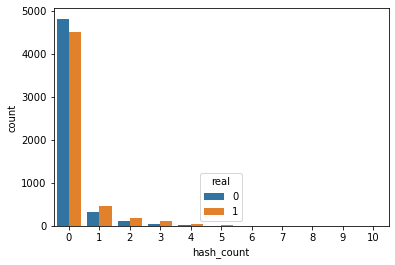

In [23]:
# hash_count distribution
sns.countplot(x='hash_count',hue='real',data=df_clean)

<AxesSubplot:xlabel='mentions_count', ylabel='count'>

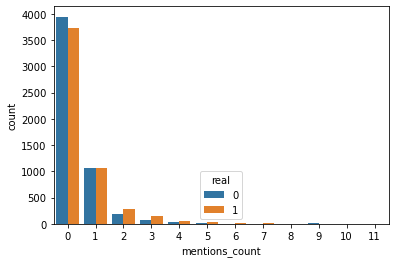

In [24]:
sns.countplot(x='mentions_count',hue='real',data=df_clean)

<AxesSubplot:xlabel='user.location', ylabel='count'>

C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 28511 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 30476 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20304 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotli

C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53468 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib

C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128071 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127988 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 30028 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38498 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotl

C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 37066 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22806 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 129300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128682 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26441 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotl

C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36523 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12462 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12522 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib

C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20024 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128282 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12429 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12360 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotli

C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 31179 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12477 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21069 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20035 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22338 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib

C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 32500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24030 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20122 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21382 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24503 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib

C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46972 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45908 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 129440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127867 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotl

C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26481 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 20140 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 37117 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 127465 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 127466 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backend

C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 19979 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 21271 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 27810 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\

C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 37066 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 22806 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 129300 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128682 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26441 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backend

C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 24687 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 12289 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26178 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 12293 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 23665 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\

C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65374 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65367 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26647 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 21407 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 20462 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\

C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 20024 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128282 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 12429 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 12360 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends

C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 3142 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 3122 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 3074 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 3095 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 3134 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backe

C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 25925 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 31282 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 29483 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 31038 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 24202 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\

C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 38893 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 2332 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 2347 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54844 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 55176 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\ba

C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65281 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65381 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128149 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 30333 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 30343 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\15714\anaconda3\envs\cds490\lib\site-packages\matplotlib\backends

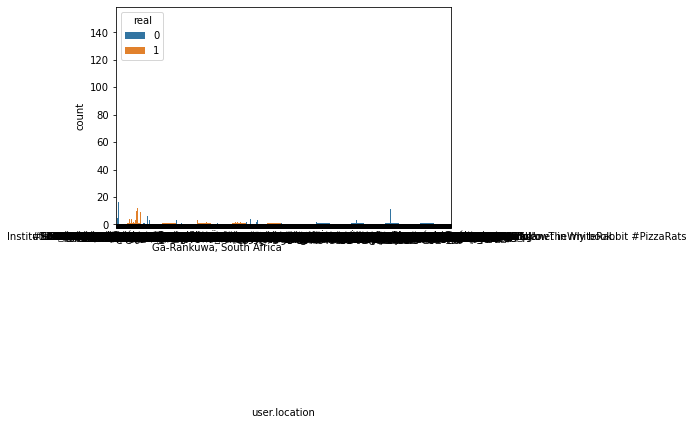

In [34]:
sns.countplot(x='user.location',hue='real',data=df_clean)

In [25]:
#deal with missing hashtags
df_clean['hashtags'] = df_clean['hashtags'].apply(lambda x: ['NoHashTag'] if not x else x)
df_clean['hashtags'] = df_clean['hashtags'].apply(lambda x: ' '.join(x))

In [27]:
#deal with missing location
df['user.location'].fillna(value='Missing', inplace=True)

In [32]:
# clean tweets
def clean_tweet(doc):
    
    #remove urls
    doc =  re.sub(r'https?://\w?\.?\w*/\w*', '', doc)
    #remove @user
    doc = re.sub(r'@\w*', '', doc)
    #remove date in the format nn/nn/nn
    doc = re.sub(r'\d+/\d+/\d+', '', doc)
    #remove time in the format hh:mm
    doc = re.sub(r'\d+:\d+', '', doc)
    #remove special signs
    doc = re.sub(r'[#@.?:-=/\\<>\]\[]', '', doc)
    #remove words containing numbers
    doc = re.sub(r'(\w+\d+|\d+\w+)', '', doc)
    return doc


df_clean['text'] = df_clean['text'].apply(clean_tweet)

In [33]:
df_clean.head()

,index,created_at,text,is_quote_status,retweet_count,favorite_count,possibly_sensitive,user.id,user.id_str,user.name,...,user.geo_enabled,user.statuses_count,user.profile_background_image_url,user.profile_background_image_url_https,user.profile_banner_url,real,hashtags,user,hash_count,mentions_count
0,975,Wed Apr 15 02:14:14 +0000 2020,Tonight on the Late Show I've got answering y...,0,178,2816,0,16303106,16303106,Stephen Colbert,...,False,6536,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,https://pbs.twimg.com/profile_banners/16303106...,1,NoHashTag,[@DrLaPook],0,1
1,32974,Tue Jun 09 16:05:34 +0000 2020,Topic for Compounding Pharmacy Achieving Quali...,0,0,0,0,1198082484069494784,1198082484069494784,PharmaSalon,...,False,97,NaN,NaN,https://pbs.twimg.com/profile_banners/11980824...,1,NoHashTag,[],0,0
2,39011,Mon Jun 29 05:34:27 +0000 2020,"COVID- Contact Tracing Apps In Bahrain, Kuwait...",0,0,0,0,1244516732280156160,1244516732280156160,Droid Titans,...,False,355,NaN,NaN,https://pbs.twimg.com/profile_banners/12445167...,1,NoHashTag,[],0,0
3,33918,Wed Jul 01 20:01:58 +0000 2020,Since the disease is most prevalent and most ...,0,0,1,0,941147291024363520,941147291024363520,Bearly Anyone,...,False,8335,NaN,NaN,https://pbs.twimg.com/profile_banners/94114729...,1,NoHashTag,[@scalzi],0,1
4,59729,Mon May 04 19:30:14 +0000 2020,Reopening Guidance for Cleaning and Disinfecti...,0,0,0,0,271853768,271853768,SCS Safety & Health,...,False,1717,http://abs.twimg.com/images/themes/theme16/bg.gif,https://abs.twimg.com/images/themes/theme16/bg...,https://pbs.twimg.com/profile_banners/27185376...,1,NoHashTag,[],0,0


In [60]:
df_clean.insert(3,'word_count',df_clean['text'].str.count(' ') + 1)

<AxesSubplot:xlabel='word_count', ylabel='count'>

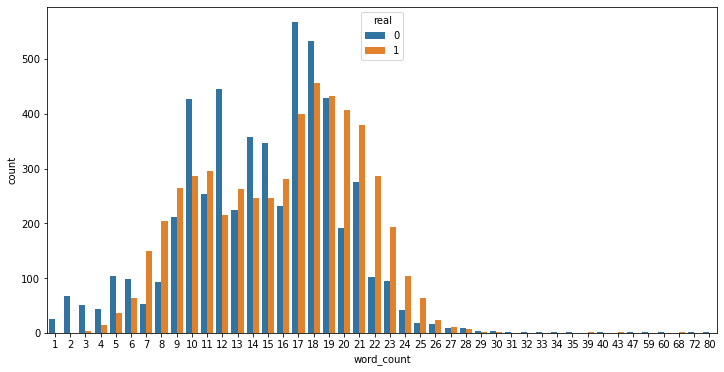

In [61]:
plt.figure(figsize=(12,6))
sns.countplot(x='word_count',hue='real',data=df_clean)

<AxesSubplot:xlabel='user.geo_enabled', ylabel='count'>

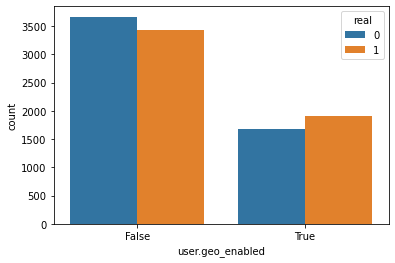

In [41]:
sns.countplot(x='user.geo_enabled',hue='real',data=df_clean)

In [43]:
df_clean.columns

Index(['index', 'created_at', 'text', 'word_count', 'is_quote_status',
       'retweet_count', 'favorite_count', 'possibly_sensitive', 'user.id',
       'user.id_str', 'user.name', 'user.screen_name', 'user.location',
       'user.description', 'user.protected', 'user.followers_count',
       'user.friends_count', 'user.listed_count', 'user.created_at',
       'user.favourites_count', 'user.geo_enabled', 'user.statuses_count',
       'user.profile_background_image_url',
       'user.profile_background_image_url_https', 'user.profile_banner_url',
       'real', 'hashtags', 'user', 'hash_count', 'mentions_count'],
      dtype='object')

In [50]:
df_clean['user.description'].isnull().sum()

1421

In [54]:
pd.isnull(8)

False

In [65]:
df_clean['user.description'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
10673    False
10674     True
10675    False
10676    False
10677    False
Name: user.description, Length: 10678, dtype: bool

In [66]:
df_clean.insert(3,'has_description',df_clean['user.description'].isna().apply(lambda x: 1 if x==False else 0))

<AxesSubplot:xlabel='has_description', ylabel='count'>

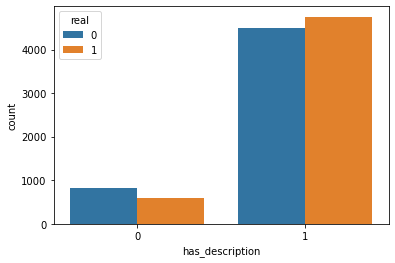

In [68]:
sns.countplot(x='has_description',hue='real',data=df_clean)

### Feature Engineering 

In [ ]:
# Tokenize Tweets
# Remember to separate both datasets after feature engineering to create training and test set

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [16]:
vect.fit(df_clean['text'])

CountVectorizer()

In [17]:
vect.get_feature_names()

['00',
 '000',
 '000人がウイルスで死亡している可能性',
 '000人突破の可能性',
 '000円分を5名様にプレゼント',
 '002',
 '007dilnawaz',
 '00am',
 '00pm',
 '01',
 '01h1a3l1iv',
 '01zmh3ydl5',
 '02eexzozw1',
 '02rhcsfh5l',
 '03',
 '039',
 '039prufsds',
 '03i2mh8uuf',
 '03serwmyqy',
 '03xlaagqao',
 '03zqo3pw1l',
 '04',
 '04t21',
 '0502791046',
 '05cnc1dbk6',
 '05g05udcir',
 '05ke2yilah',
 '05pfwcm7an',
 '05tcihufxh',
 '05tvfubrl2',
 '05ybrdvd1s',
 '06',
 '06lsggrofu',
 '06z',
 '07',
 '07003schools',
 '07056294716',
 '076',
 '07evzk9l1d',
 '07urci5cvh',
 '08',
 '080円',
 '08dlrzajow',
 '08dzdhvufu',
 '09',
 '090',
 '09hfdnoji6',
 '0aeffnr5bl',
 '0am4sizd0c',
 '0angexi0ff',
 '0atdt3ilba',
 '0av86w5ax3',
 '0b5afperzh',
 '0bjupfuumq',
 '0br7vzmzpk',
 '0brzvssugs',
 '0bwxo5k5wc',
 '0c48rzmvjs',
 '0cewg0thu5',
 '0cjbf2r4r8',
 '0crkycwvrb',
 '0ctlxaxbtw',
 '0d1ge4p9q7',
 '0d3baq2sby',
 '0d7heqfkck',
 '0dhe9eypsy',
 '0djuuhap7r',
 '0du0m5kh2y',
 '0dztfajo5i',
 '0ekgnyift7',
 '0etot5we29',
 '0f1wjjffzf',
 '0f3kakyhk8',
 '0fhvstghxd',
 

### Exploratory Analysis of Text (Extra)

In [ ]:
# remove key in entities.user_mentions from df['text']
# look at df['coordinates']

In [ ]:
df['entities.user_mentions'][8]

In [ ]:
text_sample = df.iloc[8]['text']
text_sample

In [ ]:
start = 0
stop = 26
# Remove charactes from index start to stop (inclusive)
if len(text_sample) > stop :
    strObj = text_sample[0: start:] + text_sample[stop + 1::]
strObj

In [ ]:
import ast

In [ ]:
df['entities.user_mentions'] = [ast.literal_eval(i) for i in df['entities.user_mentions']]